In [12]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/PCA/ilpd_data.csv')


In [14]:
# Preprocess the Data
# Convert GENDER to numerical values (0 for Male, 1 for Female)
data['GENDER'] = data['GENDER'].map({'Male': 0, 'Female': 1})

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Separate features and target variable
X = data.drop(columns=['SELECTOR'])  # Features
y = data['SELECTOR'].map({1: 1, 2: 0})  # Convert to binary classification (1 for disease, 0 for healthy)


In [15]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [18]:
# Make Predictions with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_scaled)


In [19]:
# Evaluate Logistic Regression Model
print("Logistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


Logistic Regression Model Evaluation:
[[ 4 26]
 [ 8 77]]
              precision    recall  f1-score   support

           0       0.33      0.13      0.19        30
           1       0.75      0.91      0.82        85

    accuracy                           0.70       115
   macro avg       0.54      0.52      0.50       115
weighted avg       0.64      0.70      0.66       115

Accuracy: 0.7043478260869566


In [20]:
# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier()

In [21]:
# Make Predictions with Gradient Boosting
y_pred_gb = gb_model.predict(X_test_scaled)


In [22]:
# Evaluate Gradient Boosting Model
print("Gradient Boosting Model Evaluation:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Model Evaluation:
[[ 9 21]
 [18 67]]
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        30
           1       0.76      0.79      0.77        85

    accuracy                           0.66       115
   macro avg       0.55      0.54      0.55       115
weighted avg       0.65      0.66      0.65       115

Accuracy: 0.6608695652173913


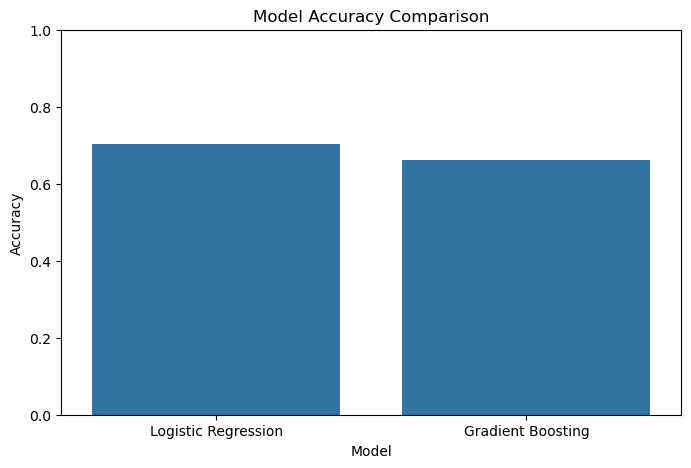

In [23]:
# Compare Model Performance
# Collect results for comparison
results = {
    'Model': ['Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_gb)],
}

results_df = pd.DataFrame(results)

# Plotting comparison of accuracies
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
